In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Problem 1

### 1a

In [2]:
def generate_data_circle(N,x0,y0,R):
    """
    Generate data uniformly distributed within a circle (x-x0)^2 + (y-y0)^2 < R^2
    """
    data = []
    for i in range(N):
        radius = R * np.sqrt(np.random.rand())
        angle = 2*np.pi * np.random.rand()
        x = radius * np.cos(angle) + x0
        y = radius * np.sin(angle) + y0
        data.append([x,y])
    return np.array(data)

In [3]:
def plot_data(data_1,data_2,data_3,title,xlim=None,ylim=None):
    """
    Plot generated data individually and collectively
    """
    fig,axs = plt.subplots(1,3,figsize=(12,4))
    axs[0].scatter(data_1[:,0],data_1[:,1],color='blue')
    axs[0].set_title(title[0])
    axs[1].scatter(data_2[:,0],data_2[:,1],color='red')
    axs[1].set_title(title[1])
    axs[2].scatter(data_3[:,0],data_3[:,1],color='orange')
    axs[2].set_title(title[2])
    plt.show()
    
    data = np.concatenate((data_1,data_2,data_3),axis=0)
    color = (['blue']*len(data_1)) + (['red']*len(data_2)) + (['orange']*len(data_3))
    fig,ax = plt.subplots(figsize=(6,6))
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    ax.scatter(data[:,0],data[:,1],color=color)
    ax.set_title("Composite plot")
    plt.show()
    return

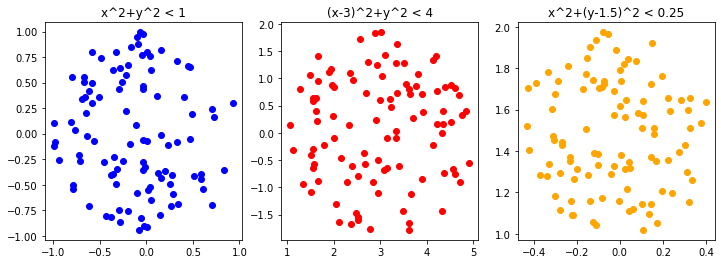

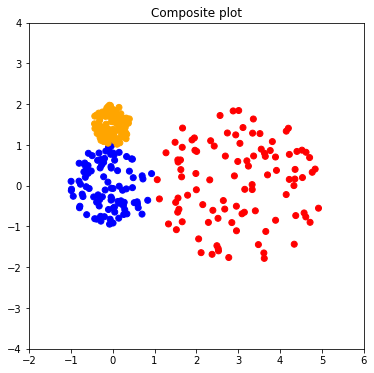

In [4]:
N = 100
# x^2+y^2 < 1
data_1 = generate_data_circle(N,0,0,1)
# (x-3)^2+y^2 < 4
data_2 = generate_data_circle(N,3,0,2)
# x^2+(y-1.5)^2 < 0.25
data_3 = generate_data_circle(N,0,1.5,0.5)
data = np.concatenate((data_1,data_2,data_3),axis=0)
title = ['x^2+y^2 < 1', '(x-3)^2+y^2 < 4', 'x^2+(y-1.5)^2 < 0.25']
plot_data(data_1,data_2,data_3,title,xlim=(-2,6),ylim=(-4,4))

### 1b

In [5]:
def compute_distances(data,weights):
    """
    Return distances between each sample with temporary centroids
    """
    num_samples = len(data)
    num_clusters = len(weights)
    distances_sq = np.zeros((num_samples,num_clusters))
    
    for i in range(num_clusters):
        #distances_sq[:,i] = np.linalg.norm(data - np.array([weights[i],]*num_samples), axis=1)**2
        distances_sq[:,i] = np.linalg.norm(data - weights[i], axis=1)**2
    return distances_sq

In [6]:
def train(data,num_clusters,lr,epochs):
    """
    Training
    """
    num_samples,num_features = data.shape
    
    ## Initialize random weights, labels
    weights = np.random.rand(num_clusters,num_features) * 0.01
    labels = np.random.randint(0,num_clusters,num_samples)
    cost_list = []
    
    
    for epoch in range(epochs):
        ## Competitive process
        distances_sq = compute_distances(data,weights)
        labels = np.argmin(distances_sq,axis=1)
        centroids_for_data = weights[labels]
        
        #cost = sum(np.linalg.norm(data - centroids_for_data, axis=1)**2) / 2
        cost = np.sum(distances_sq[range(num_samples), labels])
        cost_list.append(cost)
        
        ## Parameter update
        for i in range(num_clusters):
            intra_cluster = (labels == i)
            weights[i] = weights[i] + lr * np.sum(data[intra_cluster] - centroids_for_data[intra_cluster], axis=0)
            
    return cost_list,labels,weights

In [7]:
def plot_cluster(cost_list,labels,weights,title,xlim=None,ylim=None):
    fig,axs = plt.subplots(1,2,figsize=(12,6))
    if xlim:
        axs[0].set_xlim(xlim)
    if ylim:
        axs[0].set_ylim(ylim)
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].scatter(data[:,0],data[:,1],c=labels,alpha=0.5)
    axs[0].scatter(weights[:,0],weights[:,1],c=range(len(weights)),s=150,marker='*',edgecolors='black')
    axs[0].set_title("Cluster plot")

    axs[1].plot(range(1,epochs+1),cost_list)
    axs[1].set_title("Cost function value")
    axs[1].set_xlabel("Training epochs")
    axs[1].set_ylabel("Cost")
    
    fig.suptitle(title, fontsize=16)
    plt.show()
    return

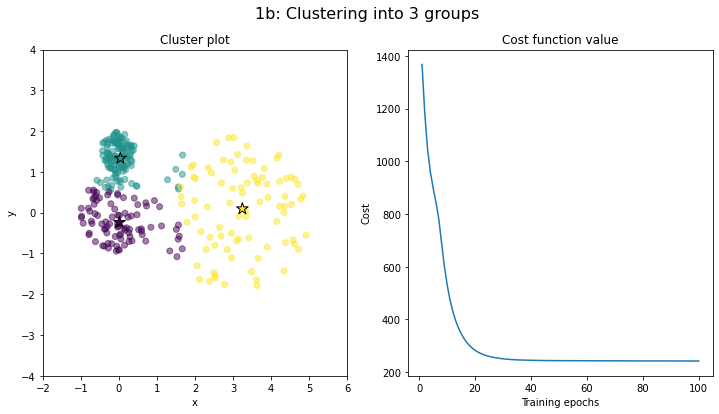

In [8]:
num_clusters = 3
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "1b: Clustering into 3 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-2,6),ylim=(-4,4))

### 1c

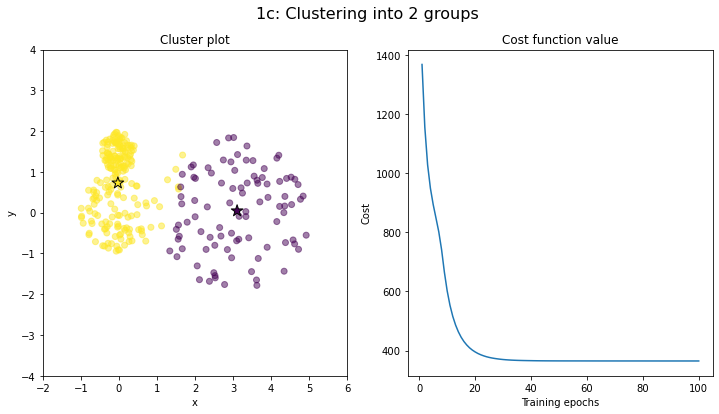

In [9]:
num_clusters = 2
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "1c: Clustering into 2 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-2,6),ylim=(-4,4))

### 1d

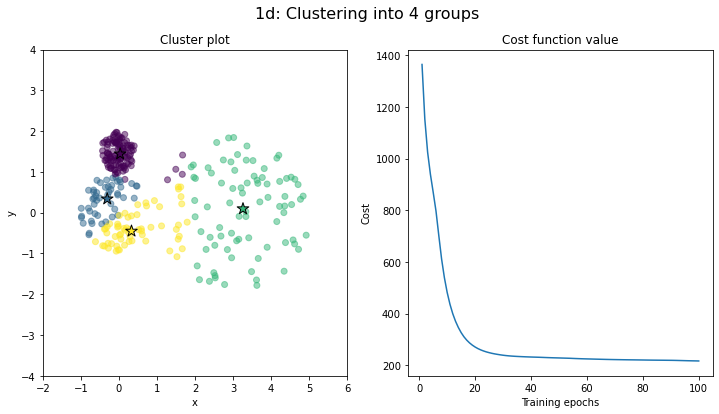

In [10]:
num_clusters = 4
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "1d: Clustering into 4 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-2,6),ylim=(-4,4))

# Problem 3

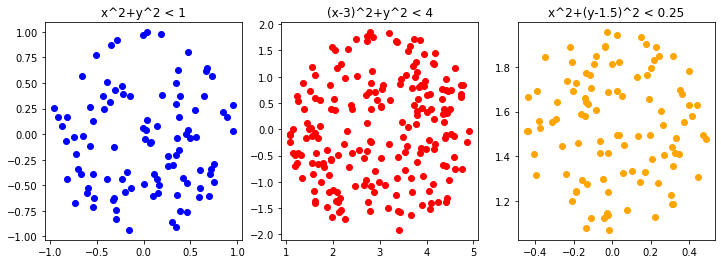

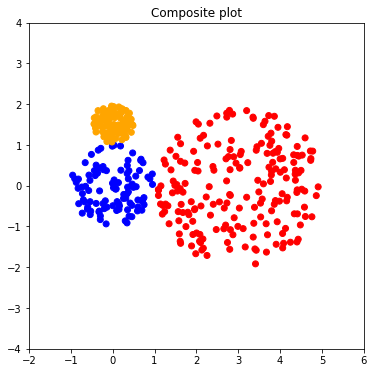

In [11]:
N1 = N3 = 100
N2 = 200
# x^2+y^2 < 1
data_1 = generate_data_circle(N1,0,0,1)
# (x-3)^2+y^2 < 4
data_2 = generate_data_circle(N2,3,0,2)
# x^2+(y-1.5)^2 < 0.25
data_3 = generate_data_circle(N3,0,1.5,0.5)
data = np.concatenate((data_1,data_2,data_3),axis=0)
title = ['x^2+y^2 < 1', '(x-3)^2+y^2 < 4', 'x^2+(y-1.5)^2 < 0.25']
plot_data(data_1,data_2,data_3,title,xlim=(-2,6),ylim=(-4,4))

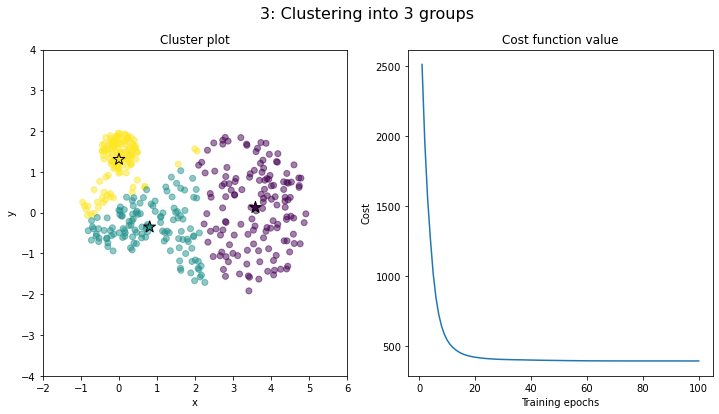

In [12]:
num_clusters = 3
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "3: Clustering into 3 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-2,6),ylim=(-4,4))

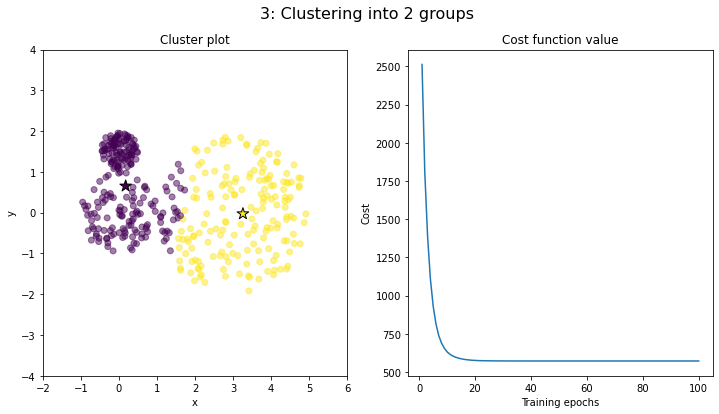

In [13]:
num_clusters = 2
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "3: Clustering into 2 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-2,6),ylim=(-4,4))

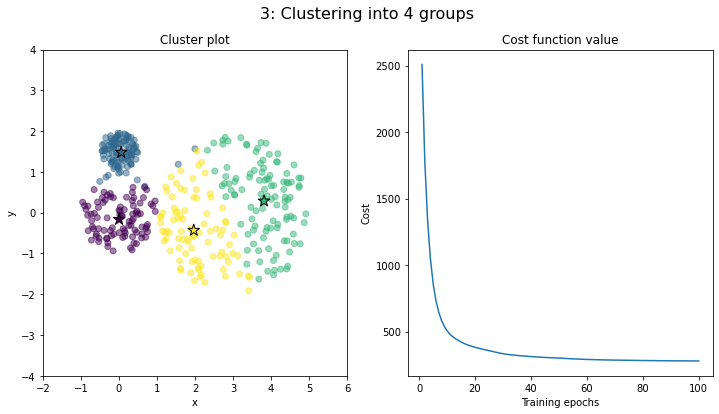

In [14]:
num_clusters = 4
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "3: Clustering into 4 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-2,6),ylim=(-4,4))

# Problem 2

Distribution functions of the type $e^{-a(X^2+Y^2)}$ are invariant within a circle $X^2+Y^2=R^2$. Therefore, we can sample $R$ from the bivariate exponential distribution first, then pick a pair $(X,Y)$ in the corresponding circle in uniform distribution. The (nonnormalized) cumulative distribution for $R$ is given by
$$\begin{matrix}
\int_{X^2+Y^2<R^2}e^{-a(X^2+Y^2)}dYdX &= \int_{0}^{R} \int_{0}^{2\pi} e^{-ar^2}r d\theta dr \\
&= \frac{2\pi}{a} \left(1-e^{-aR^2}\right)
\end{matrix}$$
In practice we use $F(R)=1-e^{-aR^2} \in [0,1)$. Uniformly pick random probability $0\leq p< 1$, then $R=F^{-1}(p) = \sqrt{-\frac{1}{a}\ln{(1-p)}}$

In [15]:
def generate_data_bivariate_exp(N,x0,y0,a):
    """
    Generate data from bivariate exponential distribution proportional to exp(-a((x-x0)^2+(y-y0)^2)
    """
    data = []
    for i in range(N):
        p = np.random.rand()
        radius = np.sqrt(-(1./a)*np.log(1-p))
        angle = 2*np.pi * np.random.rand()
        x = radius * np.cos(angle) + x0
        y = radius * np.sin(angle) + y0
        data.append([x,y])
    return np.array(data)

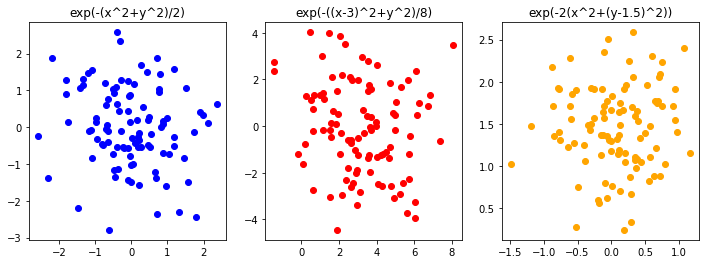

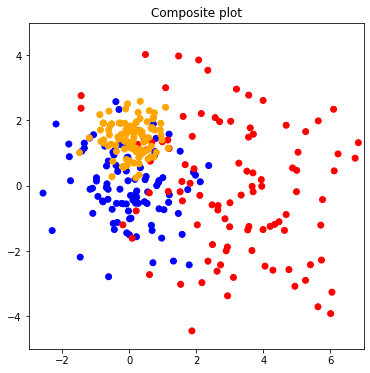

In [16]:
N = 100
# exp(-(x^2+y^2)/2)
data_1 = generate_data_bivariate_exp(N,0,0,1/2)
# exp(-((x-3)^2+y^2)/8)
data_2 = generate_data_bivariate_exp(N,3,0,1/8)
# exp(-2(x^2+(y-1.5)^2))
data_3 = generate_data_bivariate_exp(N,0,1.5,2)
data = np.concatenate((data_1,data_2,data_3),axis=0)
title = ['exp(-(x^2+y^2)/2)', 'exp(-((x-3)^2+y^2)/8)', 'exp(-2(x^2+(y-1.5)^2))']
plot_data(data_1,data_2,data_3,title,xlim=(-3,7),ylim=(-5,5))

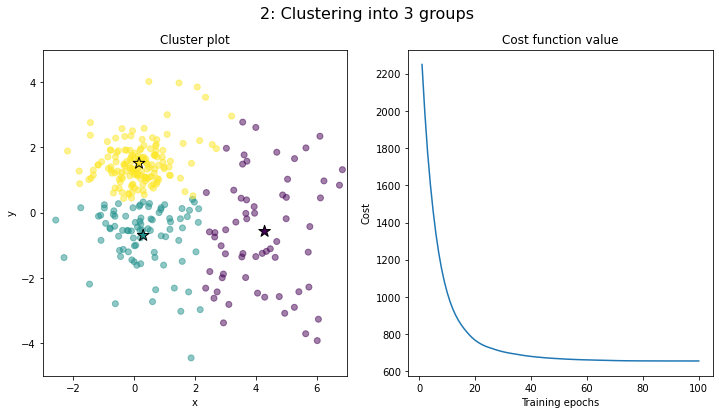

In [17]:
num_clusters = 3
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "2: Clustering into 3 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-3,7),ylim=(-5,5))

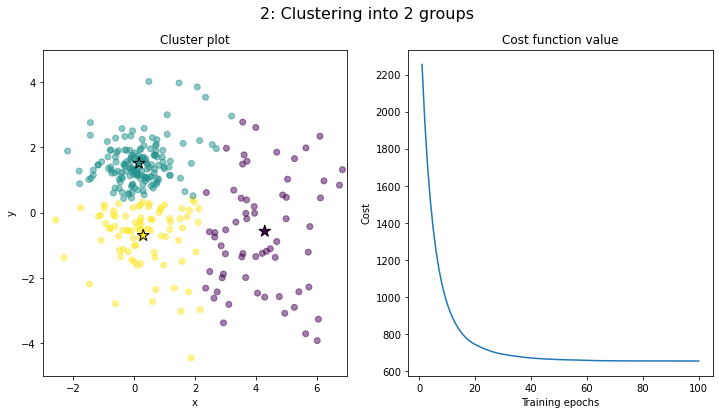

In [18]:
num_clusters = 3
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "2: Clustering into 2 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-3,7),ylim=(-5,5))

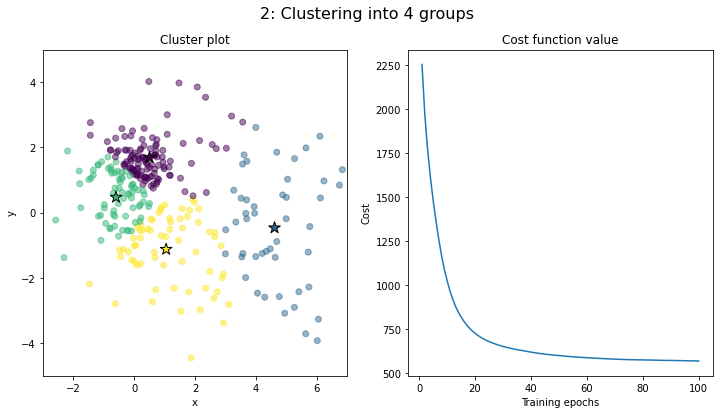

In [19]:
num_clusters = 4
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "2: Clustering into 4 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-3,7),ylim=(-5,5))

# Problem 4

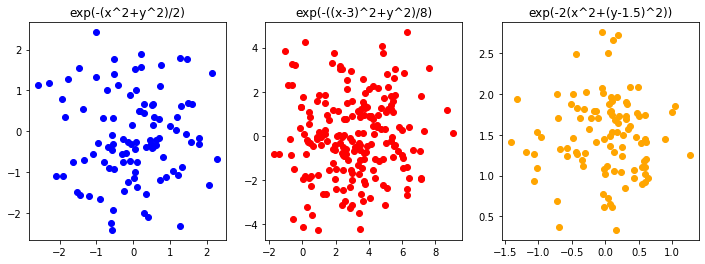

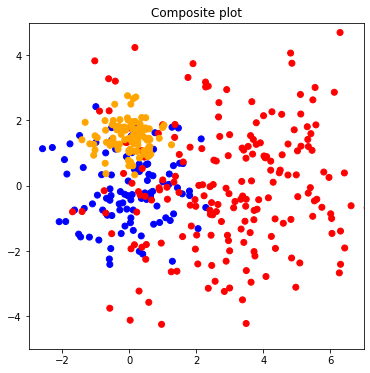

In [20]:
N1 = N3 = 100
N2 = 200
# exp(-(x^2+y^2)/2)
data_1 = generate_data_bivariate_exp(N1,0,0,1/2)
# exp(-((x-3)^2+y^2)/8)
data_2 = generate_data_bivariate_exp(N2,3,0,1/8)
# exp(-2(x^2+(y-1.5)^2))
data_3 = generate_data_bivariate_exp(N3,0,1.5,2)
data = np.concatenate((data_1,data_2,data_3),axis=0)
title = ['exp(-(x^2+y^2)/2)', 'exp(-((x-3)^2+y^2)/8)', 'exp(-2(x^2+(y-1.5)^2))']
plot_data(data_1,data_2,data_3,title,xlim=(-3,7),ylim=(-5,5))

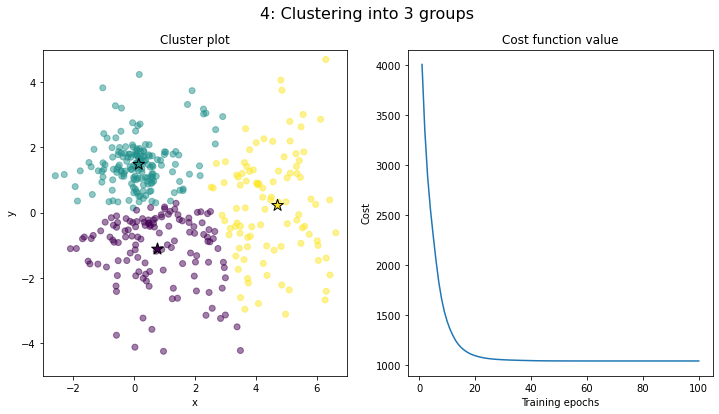

In [21]:
num_clusters = 3
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "4: Clustering into 3 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-3,7),ylim=(-5,5))

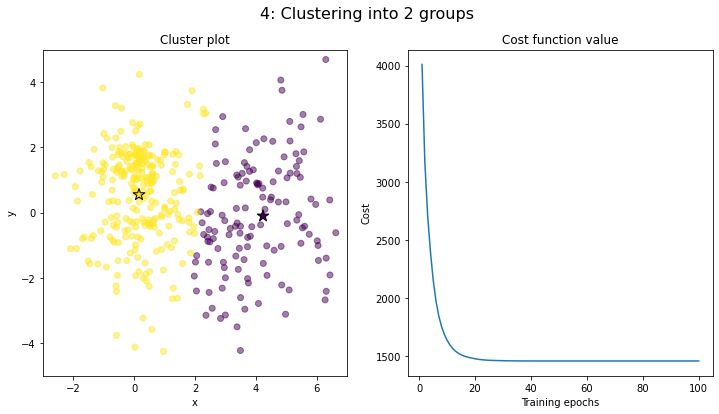

In [22]:
num_clusters = 2
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "4: Clustering into 2 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-3,7),ylim=(-5,5))

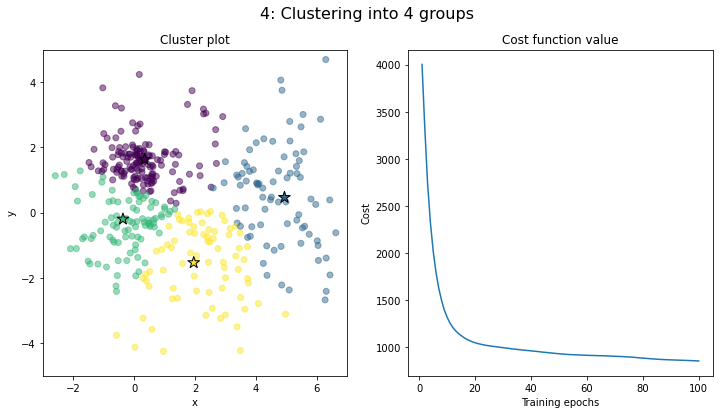

In [23]:
num_clusters = 4
epochs = 100
lr = 0.001
cost_list,labels,weights = train(data,num_clusters,lr,epochs)
title = "4: Clustering into 4 groups"
plot_cluster(cost_list,labels,weights,title,xlim=(-3,7),ylim=(-5,5))